In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
x=df.drop(['Outcome'], axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y=df['Outcome']

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of feature columns
features = x.columns  # all features in your X dataset

# 1️⃣ Correlation with target
corr_with_target = df[features.tolist() + ['Outcome']].corr()['Outcome'].sort_values(ascending=False)
print("Correlation with quality:\n", corr_with_target)


Correlation with quality:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data, then transform both
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with k=5 (you can tune this)
knn = KNeighborsClassifier(n_neighbors=18)

# Fit model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=18)

In [11]:
y_pred = knn.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7597402597402597

Confusion Matrix:
 [[88 11]
 [26 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



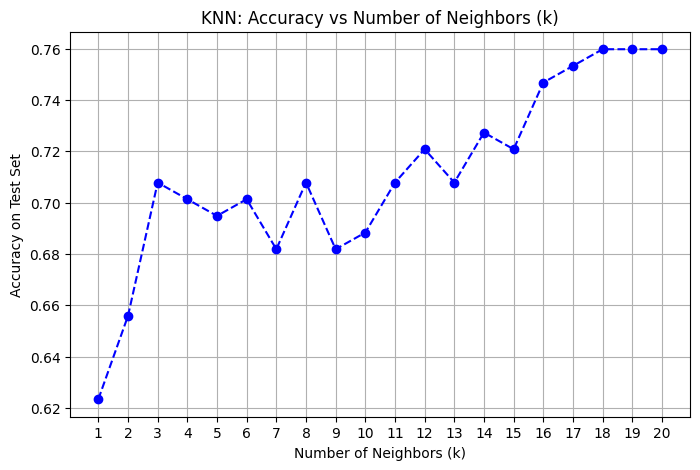

Best k: 18 with accuracy: 0.760


In [13]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 6) Plot accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("KNN: Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 7) Print best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k} with accuracy: {max(accuracies):.3f}")